In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import six


In [75]:
PATH = '/Users/a/Desktop/lab/house_price/data/city24_processed.csv'
PREDICTED_PATH = '/Users/a/Desktop/lab/house_price/data/predicted_data.csv'
PLOT_EXPORT = '/Users/a/Desktop/bachelor_thesis/plots/'

In [76]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [77]:
raw_df = pd.read_csv(PATH)
raw_df.drop('Unnamed: 0', axis=1, inplace=True)
raw_df['id'] = raw_df.index
raw_df.set_index('id', inplace=True)
raw_df


,address,hind,üldpind,ehitusaasta,rõdu,seisukord,tubade_arv,Haabersti,Kadriorg,Kesklinn,...,energy_class_a,energy_class_b,energy_class_c,energy_class_d,energy_class_e,energy_class_f,energy_class_g,korrus,saun,bassein
id,,,,,,,,,,,,,,,,,,,,,
0,Ao tn 2,649800,148.3,2018,1,1,4,0,0,1,...,0,1,0,0,0,0,0,5,1,0
1,Ravi tn 14,190000,154.2,2004,1,3,5,0,0,1,...,0,0,0,1,0,0,0,4,1,0
2,Pärnu mnt 69,75000,14.9,1911,0,2,1,0,0,1,...,0,1,0,0,0,0,0,2,0,0
3,Jakobi tn 15,77900,36.9,1960,0,2,1,0,0,1,...,0,0,0,0,0,1,0,2,0,0
4,Narva mnt 9,165000,76.0,1958,0,2,3,0,0,1,...,0,1,0,0,0,0,0,5,0,0
5,Tartu mnt 52,209900,79.5,2017,1,1,3,0,0,1,...,0,1,0,0,0,0,0,5,0,0
6,Tina 13,125000,64.6,1963,1,2,3,0,0,1,...,0,0,0,1,0,0,0,1,0,0
7,Pärnu mnt 69,119000,39.2,1911,0,2,2,0,0,1,...,0,1,0,0,0,0,0,2,0,0
8,Vesivärava tn 50,269500,105.4,2019,1,1,4,0,0,1,...,0,1,0,0,0,0,0,9,0,0


In [78]:
df = raw_df.copy()



df.shape


(2160, 46)

In [82]:
has_a = df['üldpind'] < 70
has_b = df['üldpind'] > 40
df[has_a & has_b]


,address,hind,üldpind,ehitusaasta,rõdu,seisukord,tubade_arv,Haabersti,Kadriorg,Kesklinn,...,energy_class_a,energy_class_b,energy_class_c,energy_class_d,energy_class_e,energy_class_f,energy_class_g,korrus,saun,bassein
id,,,,,,,,,,,,,,,,,,,,,
6,Tina 13,125000,64.6,1963,1,2,3,0,0,1,...,0,0,0,1,0,0,0,1,0,0
12,Väike-Ameerika tn 17,99000,53.6,1954,0,2,2,0,0,1,...,0,0,0,0,0,0,1,1,0,0
15,Pärnu mnt 130,110000,61.1,2008,0,2,2,0,0,1,...,0,1,0,0,0,0,0,6,0,0
24,Uue Maailma tn 24,150000,46.2,2006,1,2,2,0,0,1,...,0,1,0,0,0,0,0,6,0,0
36,Komeedi tn 16,165000,58.9,2008,1,2,2,0,0,1,...,0,1,0,0,0,0,0,2,1,0
37,Põhja pst. 5,182000,54.1,2015,1,1,2,0,0,1,...,0,1,0,0,0,0,0,2,0,0
40,Pirita tee 26,155000,53.6,2017,1,1,2,0,0,0,...,0,1,0,0,0,0,0,2,0,0
41,Uus-Tatari 9,134000,58.4,1993,0,2,3,0,0,1,...,0,1,0,0,0,0,0,1,0,0
42,Asula tn 1,125000,60.5,2005,1,2,2,0,0,1,...,0,1,0,0,0,0,0,2,0,0


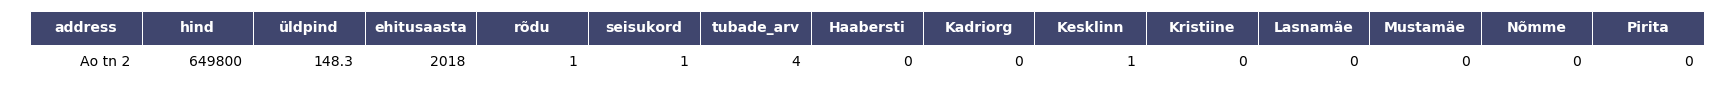

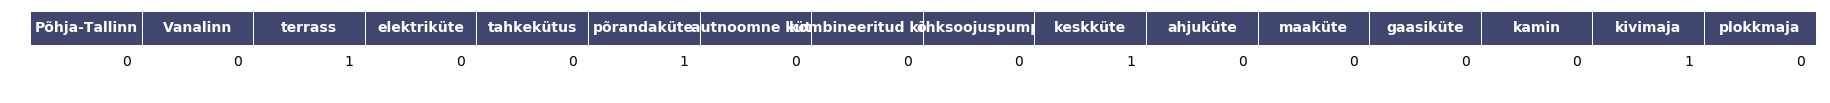

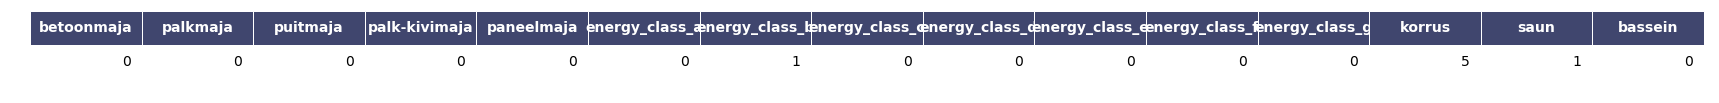

In [7]:
#df.head(1).to_csv(PLOT_EXPORT+'clean_data_sample.csv', sep='\t', encoding='utf-8')
render_mpl_table(df.head(1).iloc[:,:15], header_columns=0, col_width=2)
plt.show()
#plt.savefig(PLOT_EXPORT + 'raw_data.png', bbox_inches='tight')
render_mpl_table(df.head(1).iloc[:,15:31], header_columns=0, col_width=2)
plt.show()
render_mpl_table(df.head(1).iloc[:,31:], header_columns=0, col_width=2)
plt.show()

Feature Processing

1.Cleaning outlier features

In [8]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['hind'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.06525682]
 [-1.00765851]
 [-0.95614784]
 [-0.95414093]
 [-0.95414093]
 [-0.95347196]
 [-0.95280299]
 [-0.95146505]
 [-0.95079608]
 [-0.95079608]]

outer range (high) of the distribution:
[[ 4.04640856]
 [ 4.21365102]
 [ 4.81572387]
 [ 5.28400275]
 [ 5.55159068]
 [ 6.22056051]
 [ 7.55850018]
 [15.58613815]
 [15.58613815]
 [15.58613815]]


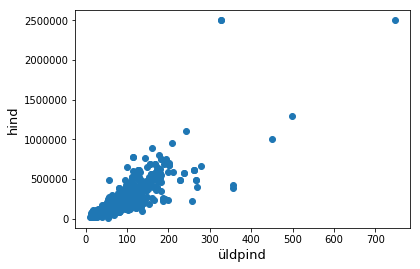

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df['üldpind'], y = df['hind'])
plt.ylabel('hind', fontsize=13)
plt.xlabel('üldpind', fontsize=13)
plt.show()
plt.savefig(PLOT_EXPORT + 'hind_yldpind_distribution.png', bbox_inches='tight')


We can see at the bottom right two with extremely large 'üldpind' that are of a low price and some at the top right with high price. These values are huge oultliers because they concern to the utility area or some luxary segment. Therefore, we can safely delete them.

In [10]:
df = df.drop(df[(df['üldpind']>500)].index)
df = df.drop(df[df['hind']>1500000].index)


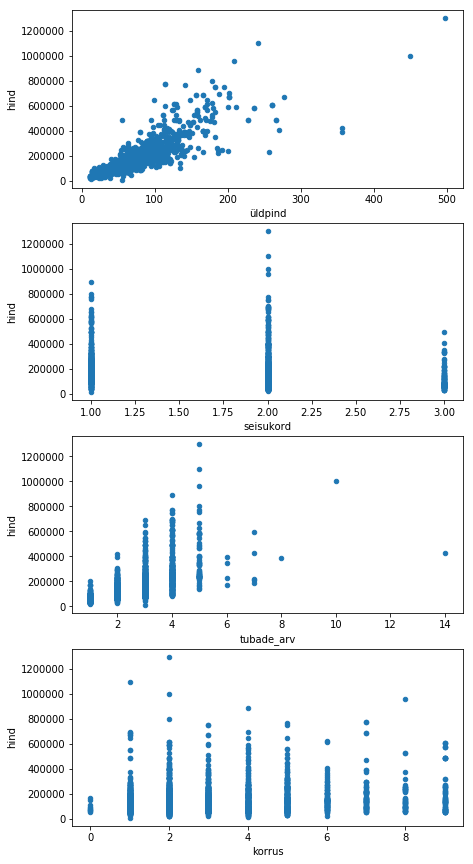

In [11]:
# make a plot to see how continuous features contribute the price
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

df.plot(x="üldpind", y="hind", ax=ax1, kind="scatter")
df.plot(x="seisukord", y="hind", ax=ax2, kind="scatter")
df.plot(x="tubade_arv", y="hind", ax=ax3, kind="scatter")
df.plot(x="korrus", y="hind", ax=ax4, kind="scatter")

plt.show()

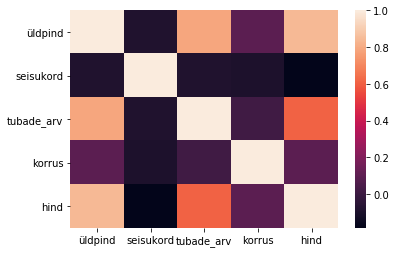

In [12]:
# correlation matrix of continous values
correlation_matrix = df[['üldpind', 'seisukord', 'tubade_arv', 'korrus', 'hind']].corr()
sns.heatmap(correlation_matrix)

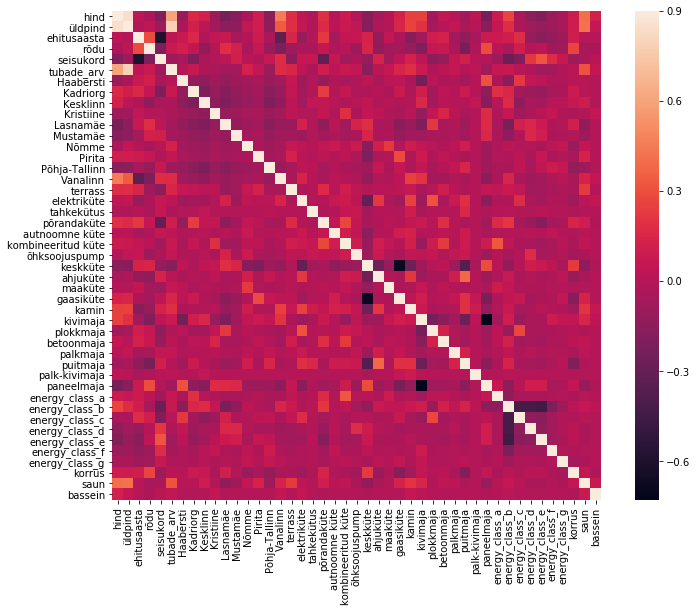

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

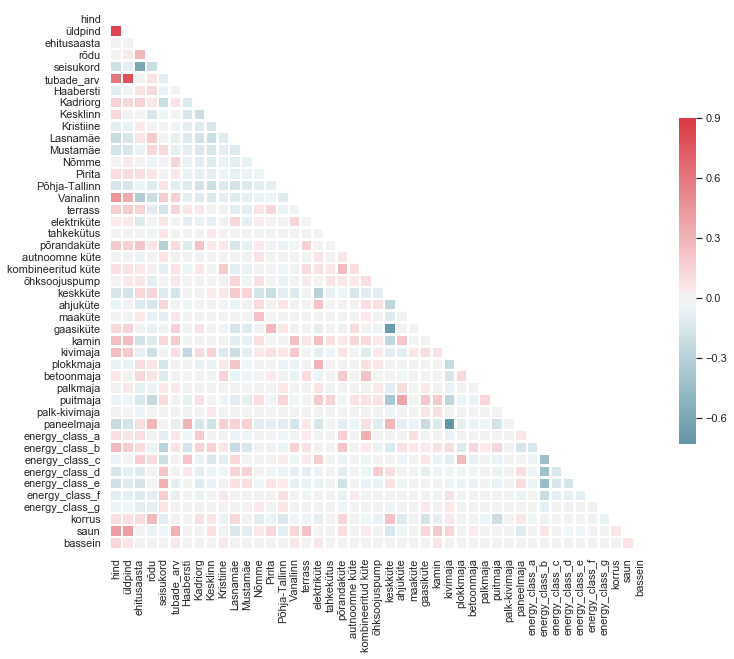

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Compute the correlation matrix
corr = corrmat

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,12))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=1.5, cbar_kws={"shrink": .5})

2.Analyzing the price


In [15]:
display(df['hind'].describe())


count    2.157000e+03
mean     1.668880e+05
std      1.217497e+05
min      1.089000e+04
25%      8.700000e+04
50%      1.390000e+05
75%      2.054700e+05
max      1.300000e+06
Name: hind, dtype: float64


 mu = 166887.96 and sigma = 121721.50



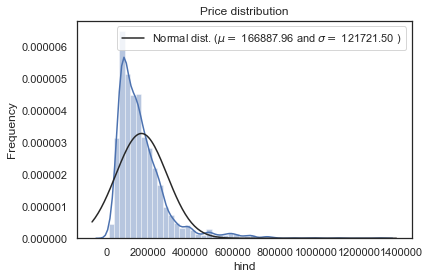

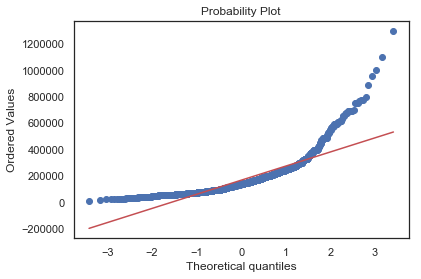

In [16]:
# lets analyze the price
sns.distplot(df['hind'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['hind'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['hind'], plot=plt)
plt.show()

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['hind'].skew())
print("Kurtosis: %f" % df['hind'].kurt())


Skewness: 2.663439
Kurtosis: 11.416486


Ok, 'hind' is not normal. It shows peakedness, positive skewness and does not follow the diagonal line.
The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Log-transformation of the target variable


 mu = 11.83 and sigma = 0.62



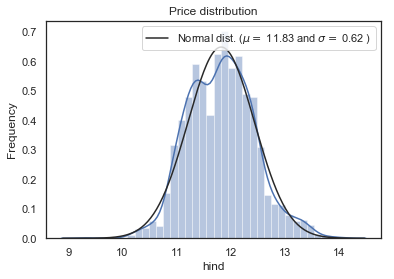

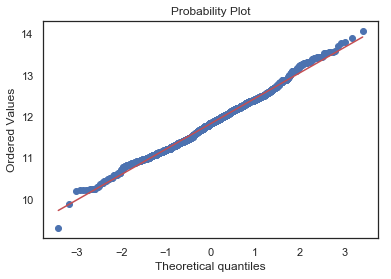

In [18]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["hind"] = np.log1p(df["hind"])

#Check the new distribution 
sns.distplot(df["hind"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["hind"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df["hind"], plot=plt)
plt.show()

In [19]:
df.columns

Index(['address', 'hind', 'üldpind', 'ehitusaasta', 'rõdu', 'seisukord',
       'tubade_arv', 'Haabersti', 'Kadriorg', 'Kesklinn', 'Kristiine',
       'Lasnamäe', 'Mustamäe', 'Nõmme', 'Pirita', 'Põhja-Tallinn', 'Vanalinn',
       'terrass', 'elektriküte', 'tahkekütus', 'põrandaküte', 'autnoomne küte',
       'kombineeritud küte', 'õhksoojuspump', 'keskküte', 'ahjuküte',
       'maaküte', 'gaasiküte', 'kamin', 'kivimaja', 'plokkmaja', 'betoonmaja',
       'palkmaja', 'puitmaja', 'palk-kivimaja', 'paneelmaja', 'energy_class_a',
       'energy_class_b', 'energy_class_c', 'energy_class_d', 'energy_class_e',
       'energy_class_f', 'energy_class_g', 'korrus', 'saun', 'bassein'],
      dtype='object')

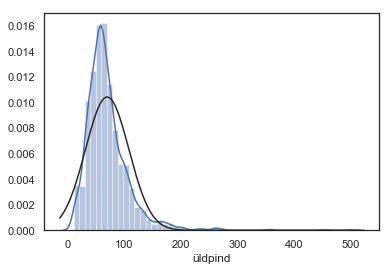

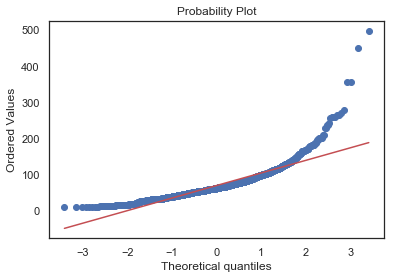

In [20]:
#histogram and normal probability plot
sns.distplot(df['üldpind'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['üldpind'], plot=plt)

In [21]:
#data transformation
df['üldpind'] = np.log(df['üldpind'])

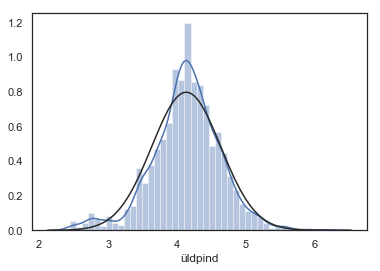

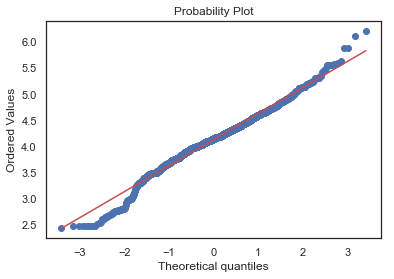

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df['üldpind'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['üldpind'], plot=plt)

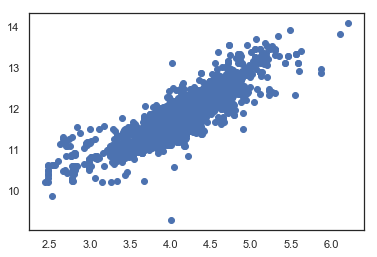

In [23]:
#scatter plot
plt.scatter(df['üldpind'], df['hind']);

In [24]:
# make build year categorical
build_year = pd.get_dummies(df['ehitusaasta'], prefix='ehitusaasta')
df = pd.concat([df, build_year], axis=1)
df.drop(['ehitusaasta'], axis=1, inplace=True)


In [25]:
# drop address column as it can not be proccesed in model
df = df.drop(['address'], axis=1)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop(["hind"])
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["hind"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["hind"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["hind"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["hind"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["hind"])
        predictions_two = lr.predict(train[features])        

        mse_two = mean_squared_error(train["hind"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])

        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["hind"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["hind"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

    
num_folds = [3, 4, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    rmse = train_and_test(df, k=fold)
    print(str(fold), "folds: ", "avg RMSE: ", str(rmse))


3 folds:  avg RMSE:  0.20050416922620987
4 folds:  avg RMSE:  0.19947968633254945
5 folds:  avg RMSE:  0.19482830625860464
7 folds:  avg RMSE:  0.1953326494200878
9 folds:  avg RMSE:  0.19437455690020336
10 folds:  avg RMSE:  0.19330570767866123
11 folds:  avg RMSE:  0.19467264539739526
13 folds:  avg RMSE:  0.19228533757209595
15 folds:  avg RMSE:  0.1924207714821275
17 folds:  avg RMSE:  0.19221234288873867
19 folds:  avg RMSE:  0.19275682836927518
21 folds:  avg RMSE:  0.19348820253845234
23 folds:  avg RMSE:  0.19231656292240992


In [27]:
# Train and test data are in the 50/50 proportions and no shuffle
rmse = train_and_test(df, k=0)
print("Train and test data are in the 50/50 proportions ", "avg RMSE: ", str(rmse))
# Train and test data are in the 50/50 proportions and shuffle data
rmse = train_and_test(df, k=1)
print("Train and test data are in the 50/50 proportions and shuffle data", "avg RMSE: ", str(rmse))
# lets pick fold number of average rmse value
# in our case 5
rmse = train_and_test(df, k=5)
print(str(5), "folds: ", "avg RMSE: ", str(rmse))

Train and test data are in the 50/50 proportions  avg RMSE:  7796778234218.725
Train and test data are in the 50/50 proportions and shuffle data avg RMSE:  3898389117109.5283
5 folds:  avg RMSE:  0.19674359490197482


In [28]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  


# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [29]:
df.columns

Index(['hind', 'üldpind', 'rõdu', 'seisukord', 'tubade_arv', 'Haabersti',
       'Kadriorg', 'Kesklinn', 'Kristiine', 'Lasnamäe',
       ...
       'ehitusaasta_2010', 'ehitusaasta_2011', 'ehitusaasta_2012',
       'ehitusaasta_2013', 'ehitusaasta_2014', 'ehitusaasta_2015',
       'ehitusaasta_2016', 'ehitusaasta_2017', 'ehitusaasta_2018',
       'ehitusaasta_2019'],
      dtype='object', length=158)

In [30]:
# split data into train and test data using sclearn library in proportion 80/20
x = np.array(df.drop(['hind'], axis=1))
y = np.array(df['hind'])
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_size  = int(df.shape[0]*0.8)

train_id = df.loc[:train_size].index
test_id = df.loc[train_size:].index

X_train = df.loc[:train_size].drop(['hind'], axis=1).values
y_train = df.loc[:train_size]['hind'].values
X_test = df.loc[train_size:].drop(['hind'], axis=1).values
y_test = df.loc[train_size:]['hind'].values


In [31]:
model_rmse_table_cols = ['model_name','score_mean', 'score_standard_deviation']
model_rmse_table = pd.DataFrame(columns=model_rmse_table_cols)

In [32]:
# Choosing average validation function that we have got earlier
n_folds = 23

def rmsle_cv_folds(model, n_folds):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle_cv_custom_data(model, train_x, train_y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x)
    rmse= np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def add_score_to_table(name, score):
    row = pd.DataFrame([[name, score.mean(), score.std()]], columns=model_rmse_table_cols)
    model_rmse_table = model_rmse_table.append(row, ignore_index=True)

Simple Linear Regression

In [33]:
lr = LinearRegression()
score = rmsle_cv(lr)
#add_score_to_table('Linear Regression', score)
print("\nLine model score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Line model score: 0.2070 (0.0639)



In [34]:
num_folds = [3, 4, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    rmse = rmsle_cv_folds(lr, fold)
    print(str(fold), "folds: ", "avg RMSE: ", str(rmse.mean()))

3 folds:  avg RMSE:  0.28280689188177904
4 folds:  avg RMSE:  0.2723777464801397
5 folds:  avg RMSE:  0.23489016275760397
7 folds:  avg RMSE:  0.23714509267919273
9 folds:  avg RMSE:  0.22726638796045937
10 folds:  avg RMSE:  0.21541617124257914
11 folds:  avg RMSE:  0.21705850123209913
13 folds:  avg RMSE:  0.21016656462538316
15 folds:  avg RMSE:  0.20492095143391523
17 folds:  avg RMSE:  0.21078822185854995
19 folds:  avg RMSE:  0.2086677067383715
21 folds:  avg RMSE:  0.20712312579493602
23 folds:  avg RMSE:  0.20699471246696385


In [35]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

score = rmsle_cv(lasso)
#add_score_to_table('Lasso', score)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.2025 (0.0635)



In [36]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rmsle_cv(ENet)
#add_score_to_table('ElasticNet', score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.2023 (0.0632)



In [37]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

score = rmsle_cv(KRR)
#add_score_to_table('Kernel Ridge', score)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Kernel Ridge score: 0.2047 (0.0652)



In [38]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
#add_score_to_table('Gradient Boosting', score)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1873 (0.0632)



In [ ]:
learning_rate_res = []
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
for eta in learning_rates:
    GBoost = GradientBoostingRegressor(learning_rate=eta)
    score = rmsle_cv(GBoost)
    learning_rate_res.append(score.mean())

line1 = plt.plot(learning_rates, learning_rate_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('learning_rates')
plt.show()

In [ ]:
n_estimators = [2000, 2500,3000, 3500, 3800]
n_estimators_res = []
for eta in n_estimators:
    GBoost = GradientBoostingRegressor(n_estimators=eta)
    score = rmsle_cv(GBoost)
    n_estimators_res.append(score.mean())
line1, = plt.plot(n_estimators, n_estimators_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()    

In [ ]:
max_depth_res = []
max_depths = np.linspace(1, 10, 10, endpoint=True)
for eta in max_depths:
    GBoost = GradientBoostingRegressor(max_depth=eta)
    score = rmsle_cv(GBoost)
    max_depth_res.append(score.mean())
line1, = plt.plot(max_depths, max_depth_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('max_depths')
plt.show()       

In [ ]:
min_samples_res = []
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
for eta in min_samples_splits:
    GBoost = GradientBoostingRegressor(min_samples_split=eta)
    score = rmsle_cv(GBoost)
    min_samples_res.append(score.mean())
line1, = plt.plot(min_samples_splits, min_samples_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('min_samples_splits')
plt.show()       

In [ ]:
min_samples_leaf_res = []
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
for eta in min_samples_leafs:
    GBoost = GradientBoostingRegressor(min_samples_leaf=eta)
    score = rmsle_cv(GBoost)
    min_samples_leaf_res.append(score.mean())
line1, = plt.plot(min_samples_leafs, min_samples_leaf_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('min_samples_leaf')
plt.show() 

In [ ]:
max_features_res = []
max_features = list(range(1,X_train.shape[1]))
for eta in max_features:
    GBoost = GradientBoostingRegressor(max_features=eta)
    score = rmsle_cv(GBoost)
    max_features_res.append(score.mean())
line1, = plt.plot(max_features, max_features_res, 'b', label='Train RMSE')
plt.ylabel('RMSE score')
plt.xlabel('max_features')
plt.show() 

In [39]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
#add_score_to_table('Xgboost', score)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Xgboost score: 0.1931 (0.0644)



In [40]:
#model_rmse_table

In [41]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [42]:
from app.model_classes.StackingAveragedModel import StackingAveragedModels
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1836 (0.0630)


In [43]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
lr.fit(X_train, y_train)
lr_test_pred = lr.predict(X_test)
lr_pred = np.expm1(lr_test_pred)
lr_rmse = rmsle(y_test, lr_test_pred)

In [ ]:
lasso.fit(X_train, y_train)
lasso_test_pred = lasso.predict(X_test)
lasso_pred = np.expm1(lasso_test_pred)
lasso_rmse = rmsle(y_test, lasso_test_pred)

In [ ]:
ENet.fit(X_train, y_train)
ENet_test_pred = ENet.predict(X_test)
ENet_pred = np.expm1(ENet_test_pred)
ENet_rmse = rmsle(y_test, ENet_test_pred)

In [ ]:
GBoost.fit(X_train, y_train)
GBoost_test_pred = GBoost.predict(X_test)
GBoost_pred = np.expm1(GBoost_test_pred)
GBoost_rmse = rmsle(y_test, GBoost_test_pred)

In [ ]:
KRR.fit(X_train, y_train)
KRR_test_pred = KRR.predict(X_test)
KRR_pred = np.expm1(KRR_test_pred)
KRR_rmse = rmsle(y_test, KRR_test_pred)

In [49]:
stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_test_pred = stacked_averaged_models.predict(X_test)
stacked_pred = np.expm1(stacked_test_pred)
stacked_pred_rmse = rmsle(y_test, stacked_test_pred)
print("RMSLE on train " + str(rmsle(y_train, stacked_train_pred)))
print("RMSLE on test " + str(stacked_pred_rmse))

RMSLE on train 0.1498439291822456
RMSLE on test 0.2113292146920706


In [50]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_test_pred = model_xgb.predict(X_test)
xgb_pred = np.expm1(xgb_test_pred)
xgb_pred_rmse = rmsle(y_test, xgb_test_pred) 
print("RMSLE on train " + str(rmsle(y_train, xgb_train_pred)))
print("RMSLE on test " + str(xgb_pred_rmse))

RMSLE on train 0.1304114018083059
RMSLE on test 0.20911880255788032


In [51]:
''''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.3 ))

ensemble_rmse = rmsle(y_test,stacked_test_pred*0.70 +
               xgb_test_pred*0.3 )
print('RMSLE score on test data:')
print(ensemble_rmse)

RMSLE score on train data:
0.14129684009565321
RMSLE score on test data:
0.20875275827458944


In [ ]:
names = ['Simple regression', 'LASSO', 'ElasticNet', 'Kerner Ridge', 'GradientBoostingRegressor',
        'XGBoost', 'StackedAveragedRegression', 'Ensemble model']
b = pd.DataFrame(data=[lr_rmse, lasso_rmse, ENet_rmse, KRR_rmse, GBoost_rmse, xgb_pred_rmse, 
                      stacked_pred_rmse, ensemble_rmse])
names_model = {'Simple regression':lr_rmse, 'LASSO':lasso_rmse, 'ElasticNet':ENet_rmse, 'Kerner Ridge':KRR_rmse, 'GradientBoostingRegressor':GBoost_rmse,
        'XGBoost':xgb_pred_rmse, 'StackedAveragedRegression':stacked_pred_rmse, 'Ensemble model':ensemble_rmse}
c = pd.DataFrame.from_dict(names_model, orient='index').sort_values(ascending=True, by=0)
plt.figure(figsize=[7,4])
c.plot(kind='bar', alpha=0.7, color='b', rot=60)
plt.ylim(0,0.25)
plt.xlabel('Models')
plt.ylabel("RMSE")
plt.legend("")
plt.show()

In [53]:
ensemble = stacked_pred*0.70 + xgb_pred*0.3


In [54]:

result = raw_df.loc[test_id]
result['predicted'] = ensemble
pred = result['predicted']
result.drop(labels=['predicted'], axis=1,inplace = True)
result.insert(loc=0, column='predicted', value=pred)
hind = result['hind']
result.drop(labels=['hind'], axis=1,inplace = True)
result.insert(0, 'hind', hind)

result.to_csv(PREDICTED_PATH, encoding='utf-8')
result


,hind,predicted,address,üldpind,ehitusaasta,rõdu,seisukord,tubade_arv,Haabersti,Kadriorg,...,energy_class_a,energy_class_b,energy_class_c,energy_class_d,energy_class_e,energy_class_f,energy_class_g,korrus,saun,bassein
id,,,,,,,,,,,,,,,,,,,,,
1725,144190,140144.773940,Kolde pst 72,55.6,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,3,0,0
1726,149190,150462.210983,Kolde pst 72,57.4,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,5,0,0
1727,170190,186812.048184,Kolde pst 72,69.9,2018,1,1,3,0,0,...,0,1,0,0,0,0,0,5,0,0
1728,104190,116981.634838,Kolde pst 72,44.3,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,5,0,0
1729,149190,143200.491626,Kolde pst 72,55.4,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,6,0,0
1730,102990,109823.012904,Kolde pst 72,42.9,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,3,0,0
1731,144190,182233.822632,Kolde pst 72,68.8,2018,1,1,3,0,0,...,0,1,0,0,0,0,0,1,0,0
1732,150190,141624.132974,Kolde pst 72,54.3,2018,1,1,2,0,0,...,0,1,0,0,0,0,0,6,0,0
1733,105190,116023.910104,Kolde pst 72,44.5,2018,1,1,1,0,0,...,0,1,0,0,0,0,0,6,0,0


In [55]:
from sklearn.externals import joblib
MODEL_PATH = '/Users/a/Desktop/lab/house_price/house_price_api/house_price_vue/models/'

# save models to disk
filename = MODEL_PATH + 'stacked_model.pkl'
joblib.dump(stacked_averaged_models, filename)

filename = MODEL_PATH + 'xgb_model.pkl'
joblib.dump(model_xgb, filename)






['/Users/a/Desktop/lab/house_price/house_price_api/house_price_vue/models/xgb_model.pkl']

In [56]:
raw_df.loc[5]

address               Tartu mnt 52
hind                        209900
üldpind                       79.5
ehitusaasta                   2017
rõdu                             1
seisukord                        1
tubade_arv                       3
Haabersti                        0
Kadriorg                         0
Kesklinn                         1
Kristiine                        0
Lasnamäe                         0
Mustamäe                         0
Nõmme                            0
Pirita                           0
Põhja-Tallinn                    0
Vanalinn                         0
terrass                          0
elektriküte                      0
tahkekütus                       0
põrandaküte                      1
autnoomne küte                   0
kombineeritud küte               0
õhksoojuspump                    0
keskküte                         0
ahjuküte                         0
maaküte                          0
gaasiküte                        0
kamin               